### Covid-19 Fake News Detection System 

## Importation des bibliothèques principales pour l'analyse de données et le machine learning


In [ ]:
import numpy as np  # Calcul scientifique et manipulation de tableaux
import pandas as pd  # Manipulation et analyse de données tabulaires

import re  # Expressions régulières pour le nettoyage de texte
import string  # Fonctions liées aux chaînes de caractères

import matplotlib.pyplot as plt  # Visualisation de données
from nltk.probability import FreqDist  # Distribution de fréquence pour l'analyse de texte
from wordcloud import WordCloud, STOPWORDS  # Nuage de mots et stopwords

from nltk.corpus import stopwords  # Liste de stopwords pour le traitement du texte
from nltk.stem import PorterStemmer  # Stemming des mots
from nltk.tokenize import TweetTokenizer  # Tokenisation spécifique aux tweets

from tqdm.autonotebook import tqdm  # Barre de progression pour les boucles

import warnings  # Gestion des avertissements
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split  # Séparation des jeux de données pour l'entraînement et le test

### Data Exploration

In [68]:
import pandas as pd

df = pd.read_csv(r'C:\Users\rahli\OneDrive\Documents\data mining\tp1\Constraint_Train.csv')
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [69]:
# Affiche le nombre de lignes et de colonnes du DataFrame
df.shape

(6420, 3)

### Data Cleaning 

In [70]:
# Vérifie le nombre de valeurs manquantes dans la colonne 'label'
df["label"].isnull().sum()

0

In [ ]:
# Supprimer la colonne 'id' du DataFrame car elle n'est pas utile pour l'analyse ou la modélisation
df.drop("id", axis=1, inplace=True) 

In [72]:
# Afficher les 5 premières lignes du DataFrame pour un aperçu des données
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [ ]:
# Convertir les valeurs de la colonne 'label' en entiers : "real" devient 0 et "fake" devient 1
df["label"] = df.label.map({"real": 0, "fake": 1})

In [ ]:
# Importer CountVectorizer pour transformer le texte en vecteurs de mots (sac de mots)
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le CountVectorizer sans conversion en minuscules
count_vector = CountVectorizer(lowercase=False)

### Data Visualization 

In [ ]:
def bar_chart(col): 
    # Compter les occurrences de chaque valeur dans la colonne spécifiée pour les tweets réels (label=0)
    real = df[df["label"] == 0][col].value_counts()  
    
    # Compter les occurrences de chaque valeur dans la colonne spécifiée pour les tweets fake (label=1)
    fake = df[df["label"] == 1][col].value_counts()  
    
    # Créer un DataFrame à partir des deux séries précédentes
    df1 = pd.DataFrame([real, fake]) 
    df1.index = ["real", "fake"]  # Nommer les lignes pour plus de clarté
    
    # Tracer le graphique en barres
    df1.plot(kind="bar") 

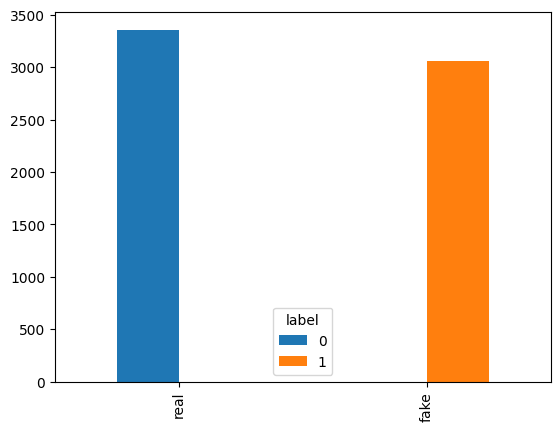

In [76]:
# Affiche un graphique en barres du nombre de tweets réels (0) et fake (1)
bar_chart("label")

In [ ]:
# Extraire les tweets sous forme de liste
words = list(df['tweet'].values)

# Définir une liste de stopwords personnalisés
stopwords = ['ourselves', 'hers','the','of','and','in', 'between', 'yourself', 'but', 'again','of', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

split_words = []
# Parcourir chaque tweet
for word in words:
    lo_w = []
    # Découper le tweet en mots
    list_of_words = str(word).split()
    # Ajouter les mots qui ne sont pas des stopwords
    for w in list_of_words:
        if w not in stopwords:
            lo_w.append(w)
    split_words.append(lo_w)

# Fusionner toutes les listes de mots en une seule liste
allwords = []
for wordlist in split_words:
    allwords += wordlist

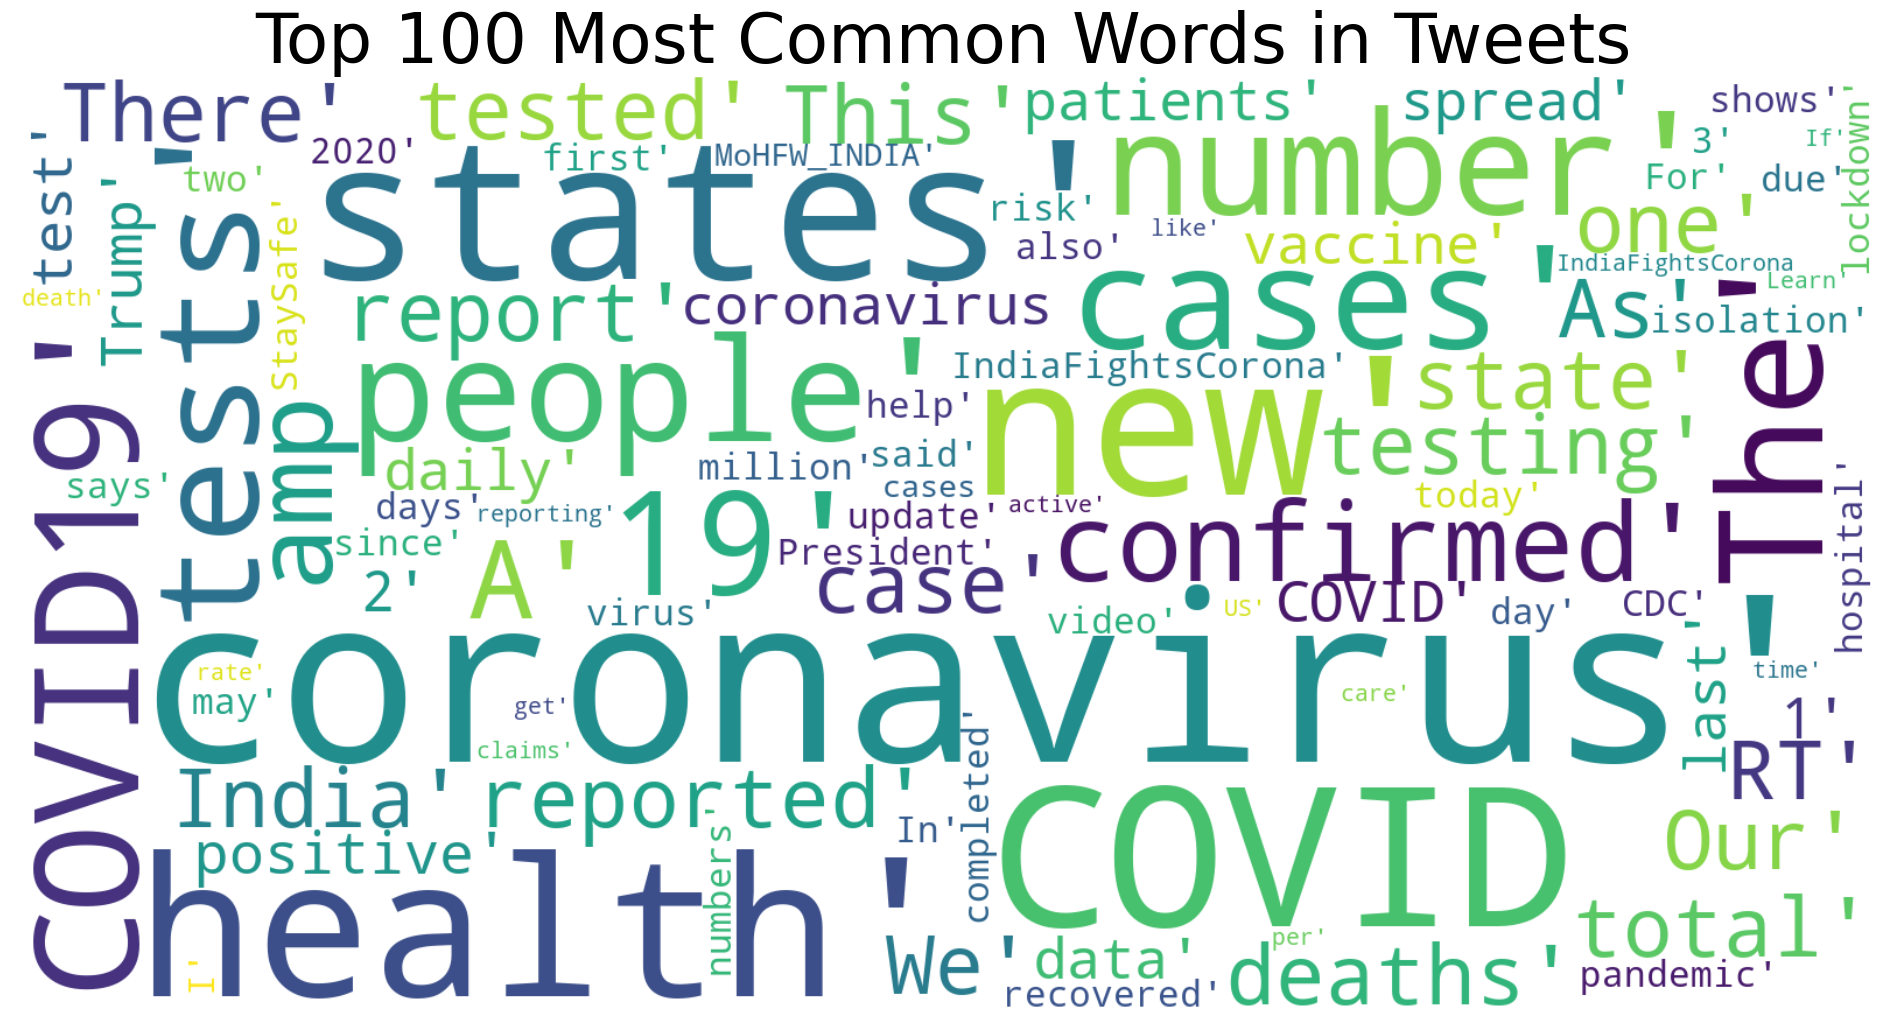

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

# Calculer la fréquence des 100 mots les plus courants dans la liste allwords
mostcommon = FreqDist(allwords).most_common(100)

# Générer un nuage de mots à partir des mots les plus fréquents
wordcloud = WordCloud(
    width=1600, height=800, background_color='white', stopwords=STOPWORDS
).generate(str(mostcommon))

# Créer une figure pour afficher le nuage de mots
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Masquer les axes
plt.title('Top 100 Most Common Words in Tweets', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Model Development 

In [ ]:
from sklearn.model_selection import train_test_split

# Séparer les tweets (X) et les labels (y)
X = df["tweet"].values
y = df["label"] 

# Diviser les données en ensembles d'entraînement et de test (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
# Transformer les tweets d'entraînement en vecteurs de caractéristiques (Bag of Words)
training_data = count_vector.fit_transform(X_train)  

# Transformer les tweets de test en utilisant le même vocabulaire (pas de fit, seulement transform)
testing_data = count_vector.transform(X_test) 

In [ ]:
from sklearn.linear_model import LogisticRegression  

# Initialiser le modèle de régression logistique
lr = LogisticRegression() 

# Entraîner le modèle sur les données d'entraînement
lr.fit(training_data, y_train) 

# Prédire les labels sur les données de test
pred = lr.predict(testing_data) 

In [ ]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline

# Initialiser un classificateur SVM avec gamma fixé à 'auto'
svm_clf = SVC(gamma='auto') 

# Entraîner le modèle SVM sur les données d'entraînement
svm_clf.fit(training_data, y_train) 

# Prédire les labels sur les données de test
pred1 = svm_clf.predict(testing_data) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Initialiser le classificateur d'arbre de décision avec une profondeur maximale de 6 et une graine aléatoire pour la reproductibilité
dtc_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

# Entraîner le modèle sur les données d'entraînement
dtc_clf.fit(training_data, y_train)

# Prédire les labels sur les données de test
pred2 = dtc_clf.predict(testing_data)

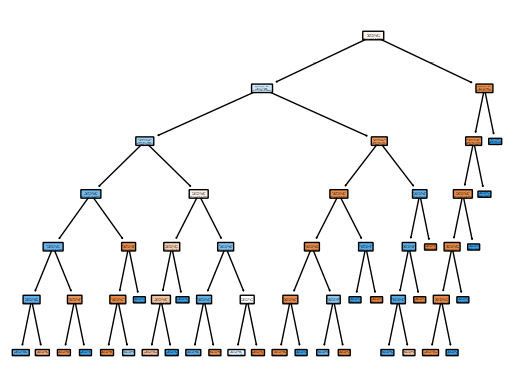

In [84]:
from sklearn.tree import plot_tree

# Afficher l'arbre de décision entraîné (dtc_clf) avec les noms de classes et options de style
dec_tree = plot_tree(
    decision_tree=dtc_clf,
    class_names=["real", "fake"],
    filled=True,
    rounded=True
)


L’arbre de décision affiché ci-dessus a été entraîné pour distinguer les tweets réels des tweets fake concernant la Covid-19. Chaque nœud de l’arbre représente une condition sur la présence ou l’absence de certains mots dans les tweets, permettant de segmenter progressivement les données. Les feuilles de l’arbre indiquent la prédiction finale (real ou fake) pour chaque sous-ensemble de tweets. Cet arbre facilite l’interprétation des critères utilisés par le modèle pour classer les tweets, en mettant en évidence les mots ou expressions les plus discriminants dans la détection des fake news.

In [103]:
from sklearn.metrics import classification_report

# Afficher le rapport de classification pour le modèle DecisionTree
print(classification_report(y_test, pred2, target_names=["real", "fake"]))

              precision    recall  f1-score   support

        real       0.81      0.88      0.84       329
        fake       0.86      0.78      0.82       313

    accuracy                           0.83       642
   macro avg       0.84      0.83      0.83       642
weighted avg       0.84      0.83      0.83       642



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser le classificateur Random Forest avec 500 arbres et 16 feuilles max
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rnd_clf.fit(training_data, y_train)

# Prédire les labels sur les données de test
pred3 = rnd_clf.predict(testing_data)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialiser le classificateur AdaBoost avec un arbre de décision de profondeur 1 comme estimateur de base
ada_clf = AdaBoostClassifier(
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(training_data, y_train) 

pred4 = ada_clf.predict(testing_data) 

In [87]:
from sklearn.metrics import accuracy_score 

# Calculer la précision (accuracy) du modèle de régression logistique sur les données de test
acc1 = accuracy_score(pred, y_test) 

# Afficher la précision obtenue
acc1

0.9345794392523364

In [88]:
from sklearn.metrics import accuracy_score 

# Calculer la précision (accuracy) du modèle SVM sur les données de test
acc2 = accuracy_score(pred1, y_test) 

# Afficher la précision obtenue
acc2

0.6588785046728972

In [89]:
# Calculer la précision (accuracy) du modèle DecisionTree sur les données de test
acc3 = accuracy_score(pred2, y_test)

# Afficher la précision obtenue
acc3

0.8333333333333334

In [90]:
def new_func():
    # Calculer la précision (accuracy) du modèle RandomForest sur les données de test
    acc4 = accuracy_score(pred3, y_test)
    acc4  # La variable acc4 contient la précision, mais n'est pas affichée

new_func()

0.8847352024922118

In [91]:
# Calculer la précision (accuracy) du modèle AdaBoost sur les données de test
acc5 = accuracy_score(pred4, y_test) 
acc5  # Afficher la précision obtenue

0.8551401869158879

### Clustering

In [92]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer le clustering hiérarchique (Agglomerative) sur les données d'entraînement vectorisées
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
hierarchical_clusters = hierarchical_clustering.fit_predict(training_data.toarray())

# Créer un DataFrame d'entraînement à partir de X_train et y_train
df_train = pd.DataFrame({'tweet': X_train, 'label': y_train.values})

# Ajouter les labels de cluster hiérarchique au DataFrame
df_train['hierarchical_cluster'] = hierarchical_clusters

# Afficher les premières lignes pour vérification
df_train.head()


,tweet,label,hierarchical_cluster
0,Saint Luke’s Hospital of USA says that consumi...,1,0
1,220 new cases of #COVID19; 62-Lagos 52-FCT 31-...,0,0
2,After #coronavirus damaged her lungs woman in ...,0,0
3,In the backdrop of the lockdown videos of wild...,1,0
4,Thank God! New Covid-19 Clusters Mostly Affect...,1,0


In [93]:
from sklearn.cluster import KMeans

# Initialiser le modèle KMeans pour regrouper les données en 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Appliquer KMeans sur les données d'entraînement vectorisées (Bag of Words)
kmeans_clusters = kmeans.fit_predict(training_data)

# Afficher le nombre d'échantillons dans chaque cluster
print(np.bincount(kmeans_clusters))

[4118 1660]


In [94]:
from sklearn.cluster import DBSCAN

# Initialiser le modèle DBSCAN avec une distance epsilon de 3 et au moins 5 échantillons par cluster
dbscan = DBSCAN(eps=3, min_samples=5, metric='euclidean')

# Appliquer DBSCAN sur les données d'entraînement vectorisées (converties en tableau dense)
dbscan_clusters = dbscan.fit_predict(training_data.toarray())

# Ajouter les labels de cluster DBSCAN au DataFrame d'entraînement
df_train['dbscan_cluster'] = dbscan_clusters

# Afficher le nombre d'échantillons dans chaque cluster DBSCAN
df_train['dbscan_cluster'].value_counts()

dbscan_cluster
-1     5454
 1      232
 2       14
 5       14
 0        7
 8        7
 12       7
 4        6
 6        6
 9        6
 3        5
 7        5
 10       5
 11       5
 13       5
Name: count, dtype: int64

In [104]:
from sklearn.mixture import GaussianMixture

# Initialiser le modèle de mélange gaussien (GMM) pour 2 clusters
gmm = GaussianMixture(n_components=2, random_state=42)

# Appliquer le clustering GMM sur les données d'entraînement vectorisées (converties en tableau dense)
gmm_clusters = gmm.fit_predict(training_data.toarray())

# Ajouter les labels de cluster GMM au DataFrame d'entraînement
df_train['gmm_cluster'] = gmm_clusters

# Afficher le nombre d'échantillons dans chaque cluster GMM
df_train['gmm_cluster'].value_counts()

gmm_cluster
0    4118
1    1660
Name: count, dtype: int64

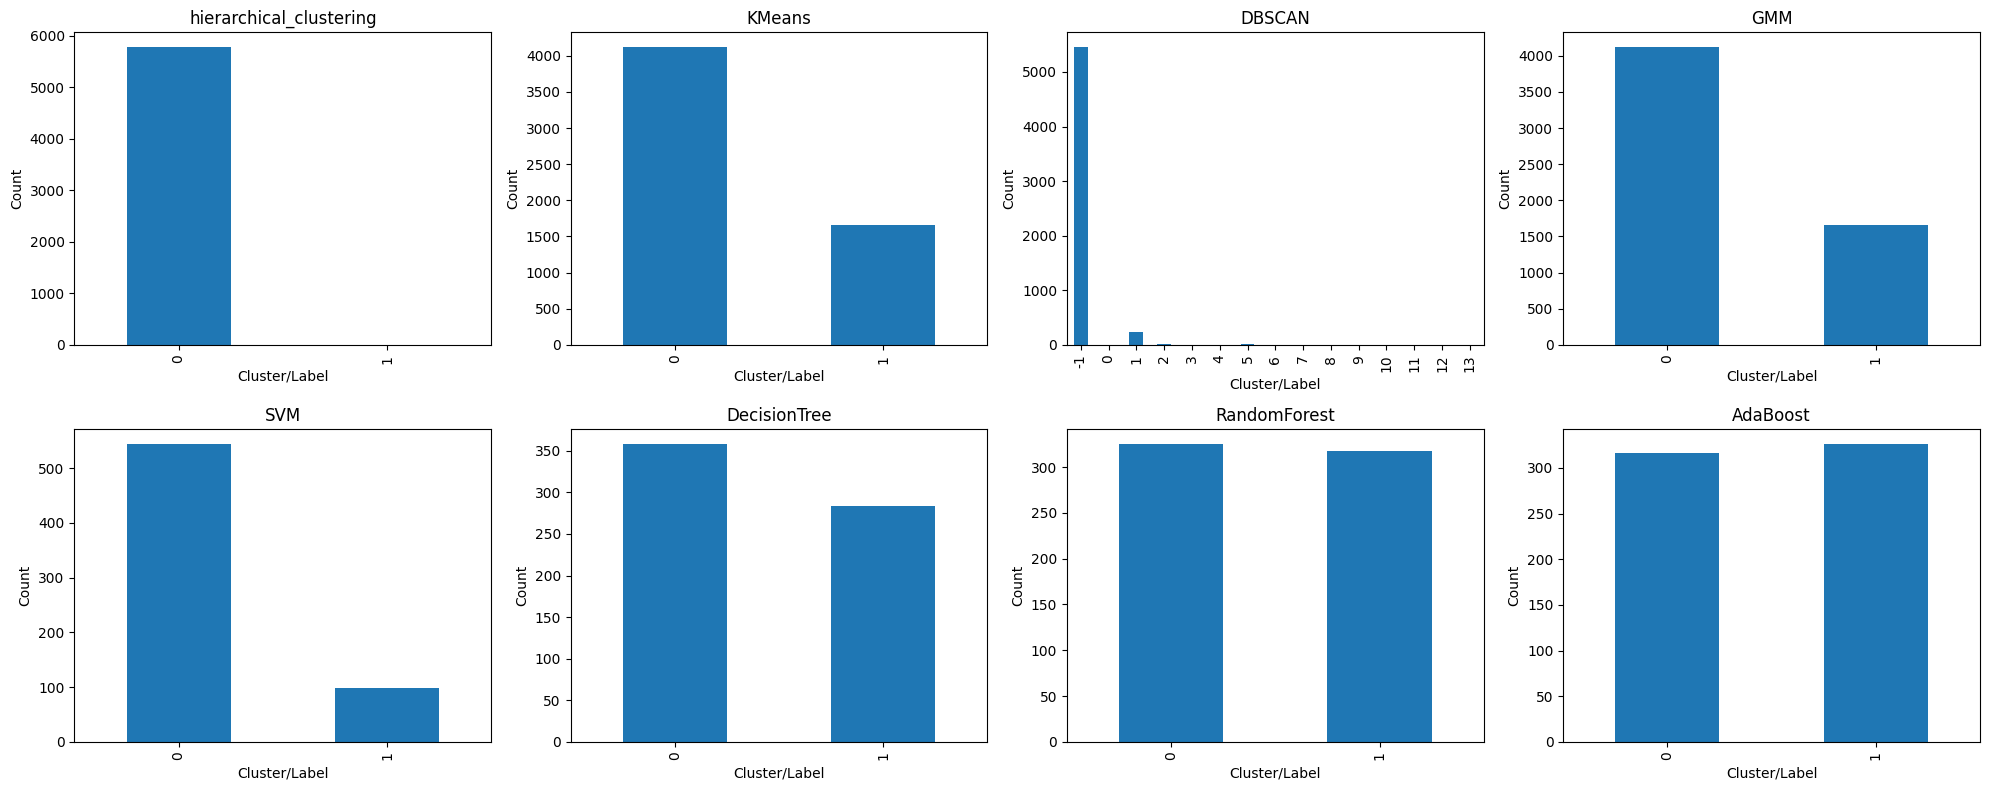

In [96]:
import matplotlib.pyplot as plt

# Récupérer les résultats de clustering pour chaque méthode
agg = df_train['hierarchical_cluster']  
kmeans = kmeans_clusters
dbscan = df_train['dbscan_cluster']
gmm = df_train['gmm_cluster']

# Dictionnaire des résultats supervisés (prédictions des modèles)
supervised_results = {
    'SVM': pred1,
    'DecisionTree': pred2,
    'RandomForest': pred3,
    'AdaBoost': pred4
}

# Créer un DataFrame avec les résultats de clustering
clustering_results = pd.DataFrame({
    'hierarchical_clustering': agg,
    'KMeans': kmeans,
    'DBSCAN': dbscan,
    'GMM': gmm
})

# Compter le nombre d'échantillons dans chaque cluster/label pour chaque méthode
cluster_counts = {}
for method in clustering_results.columns:
    cluster_counts[method] = clustering_results[method].value_counts().sort_index()

# Ajouter les comptes pour les modèles supervisés
for name, preds in supervised_results.items():
    cluster_counts[name] = pd.Series(preds).value_counts().sort_index()

# Afficher les distributions sous forme de graphiques en barres
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
methods = list(clustering_results.columns) + list(supervised_results.keys())
for i, method in enumerate(methods):
    ax = axes[i // 4, i % 4]
    cluster_counts[method].plot(kind='bar', ax=ax, title=method)
    ax.set_xlabel('Cluster/Label')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


- Hierarchical Clustering 
    Le clustering hiérarchique regroupe les données en formant une hiérarchie d’ensembles imbriqués. Il commence par considérer chaque point comme un cluster individuel, puis fusionne progressivement les clusters les plus proches jusqu’à obtenir le nombre souhaité de groupes. Cette méthode est utile pour visualiser la structure des données sous forme d’arbre (dendrogramme).

- KMeans 
    KMeans est un algorithme de clustering qui partitionne les données en un nombre fixe de clusters (k) en minimisant la distance intra-cluster. Il attribue chaque point au cluster dont le centre (centroïde) est le plus proche, puis ajuste les centroïdes jusqu’à convergence.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)  
    DBSCAN regroupe les points proches les uns des autres en fonction d’une densité minimale et marque comme bruit les points isolés. Il est efficace pour détecter des clusters de forme arbitraire et gérer les valeurs aberrantes.

- GMM (Gaussian Mixture Model)
    Le modèle de mélange gaussien suppose que les données sont générées à partir de plusieurs distributions normales (gaussiennes). Il utilise l’algorithme EM pour estimer les paramètres et attribue à chaque point une probabilité d’appartenance à chaque cluster.

- SVM (Support Vector Machine) 
    SVM est un algorithme de classification supervisée qui cherche à séparer les classes par un hyperplan optimal, maximisant la marge entre les points des différentes classes. Il est efficace pour les problèmes linéaires et non linéaires grâce à l’utilisation de noyaux.

- Decision Tree (Arbre de décision) 
    Un arbre de décision classe les données en posant une série de questions (conditions) sur les caractéristiques. Chaque nœud représente une condition, et chaque feuille une prédiction. Il est facilement interprétable et peut gérer des données catégorielles ou numériques.

- Random Forest 
    Random Forest est un ensemble d’arbres de décision construits sur des sous-échantillons aléatoires des données et des caractéristiques. Il améliore la précision et la robustesse par rapport à un arbre unique, tout en réduisant le risque de surapprentissage.

- AdaBoost (Adaptive Boosting)
    AdaBoost combine plusieurs classificateurs faibles (souvent des arbres de décision peu profonds) pour former un classificateur fort. À chaque itération, il accorde plus de poids aux exemples mal classés, permettant au modèle de se concentrer sur les cas difficiles.


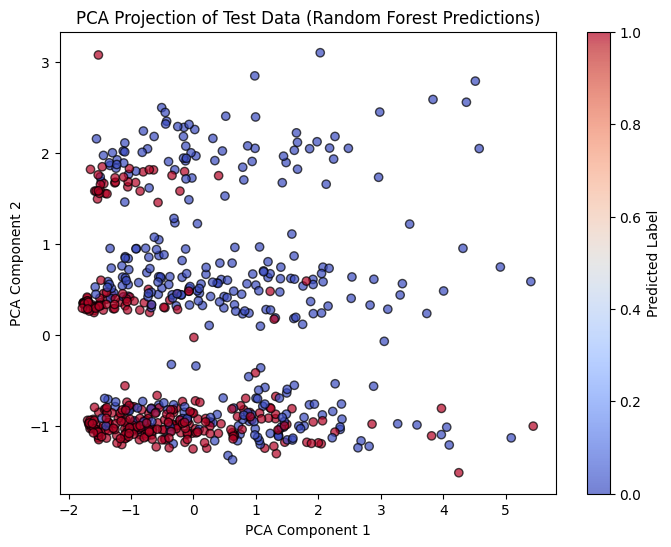

In [ ]:
from sklearn.decomposition import PCA

# Réduction de dimensionnalité : appliquer PCA pour projeter les données de test sur 2 composantes principales
pca = PCA(n_components=2)
testing_data_pca = pca.fit_transform(testing_data.toarray())

# Création d'une figure pour la visualisation
plt.figure(figsize=(8, 6))

# Tracer les points projetés selon les prédictions du modèle Random Forest
scatter = plt.scatter(
    testing_data_pca[:, 0], testing_data_pca[:, 1],
    c=pred3, cmap='coolwarm', alpha=0.7, edgecolor='k'
)

# Ajouter les labels et le titre du graphique
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Test Data (Random Forest Predictions)')

# Ajouter une barre de couleur pour indiquer les labels prédits
plt.colorbar(scatter, label='Predicted Label')

# Afficher le graphique
plt.show()

Ce graphique présente la projection des données de test sur les deux premières composantes principales obtenues par l’analyse en composantes principales (PCA). Chaque point représente un tweet, coloré selon la prédiction du modèle Random Forest (0 : réel, 1 : fake). Cette visualisation permet d’observer la séparation des classes prédictes dans l’espace réduit à deux dimensions, facilitant l’interprétation de la capacité du modèle à distinguer les fake news des vraies informations sur la Covid-19. Les regroupements ou chevauchements éventuels indiquent la difficulté ou la facilité de classification pour certaines observations.

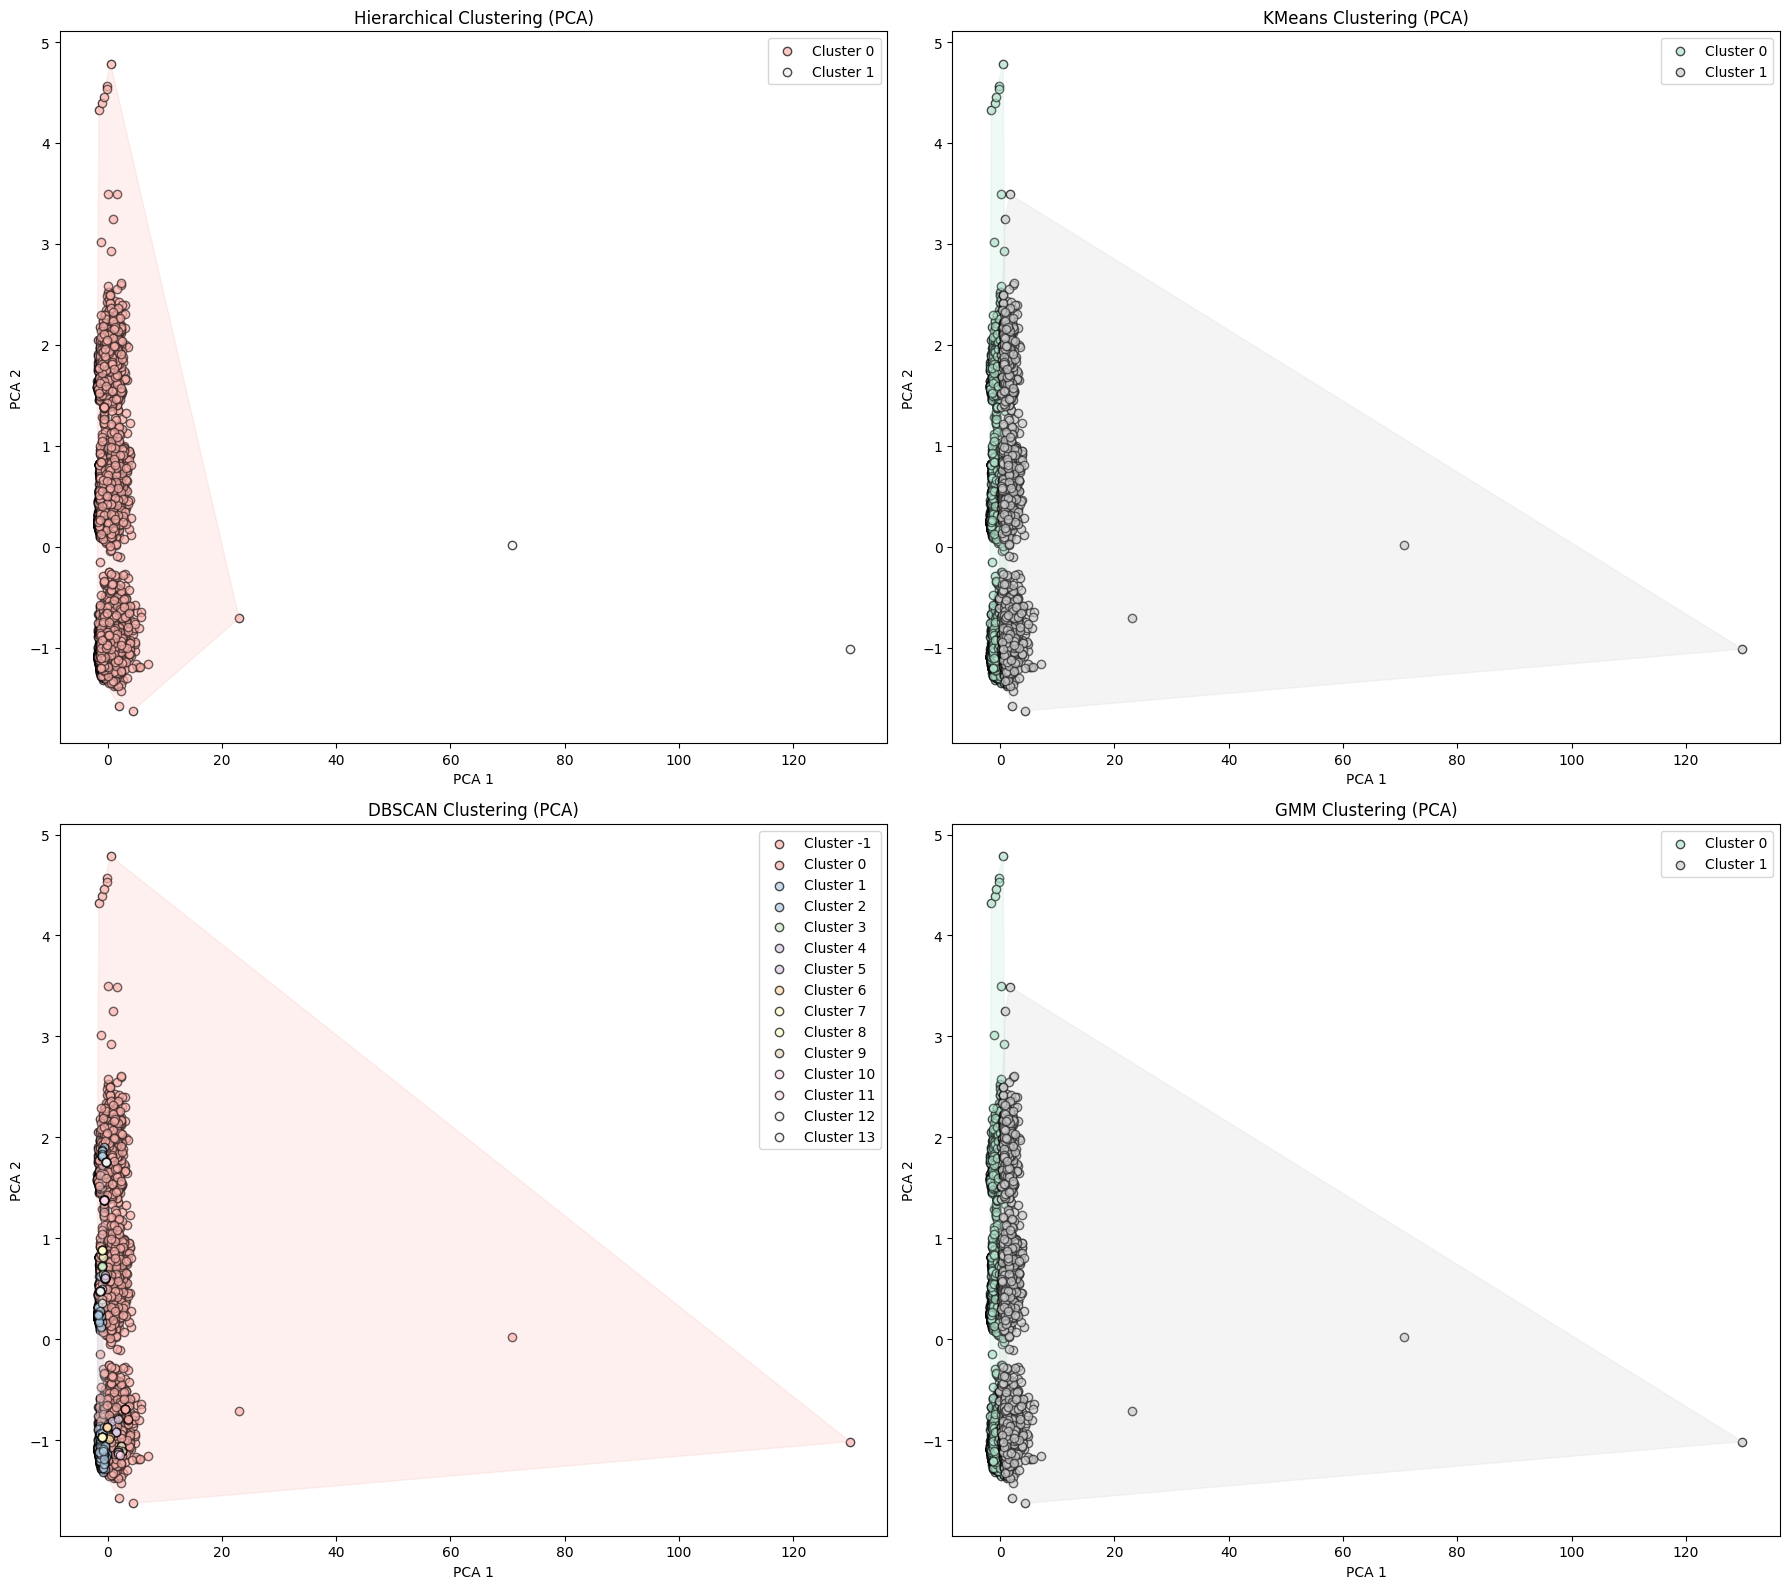

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

def plot_with_hulls(X_pca, labels, ax, title, cmap):
    # Trouver les labels uniques (clusters/classes)
    unique_labels = np.unique(labels)
    # Générer une couleur différente pour chaque cluster
    colors = plt.get_cmap(cmap)(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        # Masque pour sélectionner les points du cluster courant
        mask = labels == label
        # Afficher les points du cluster dans l'espace PCA
        ax.scatter(X_pca[mask, 0], X_pca[mask, 1], color=colors[i], label=f'Cluster {label}', alpha=0.7, edgecolor='k')
        # Tracer l'enveloppe convexe si le cluster contient plus de 2 points
        if np.sum(mask) > 2:
            hull = ConvexHull(X_pca[mask])
            hull_points = X_pca[mask][hull.vertices]
            ax.fill(hull_points[:,0], hull_points[:,1], color=colors[i], alpha=0.2)
    # Ajouter titre et labels d'axes
    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.legend()

# Créer une figure avec 4 sous-graphiques pour comparer les méthodes de clustering
fig, axs = plt.subplots(2, 2, figsize=(18, 16))

# Afficher les clusters hiérarchiques
plot_with_hulls(X_pca, df_train['hierarchical_cluster'].values, axs[0,0], 'Hierarchical Clustering (PCA)', 'Pastel1')
# Afficher les clusters KMeans
plot_with_hulls(X_pca, kmeans_clusters, axs[0,1], 'KMeans Clustering (PCA)', 'Pastel2')
# Afficher les clusters DBSCAN
plot_with_hulls(X_pca, df_train['dbscan_cluster'].values, axs[1,0], 'DBSCAN Clustering (PCA)', 'Pastel1')
# Afficher les clusters GMM
plot_with_hulls(X_pca, df_train['gmm_cluster'].values, axs[1,1], 'GMM Clustering (PCA)', 'Pastel2')

# Ajuster la disposition et afficher la figure
plt.tight_layout()
plt.show()


- Hierarchical Clustering (PCA)
    Ce graphique montre la répartition des tweets dans l’espace réduit à deux dimensions par PCA, colorés selon les clusters trouvés par le clustering hiérarchique. Les enveloppes convexes illustrent les frontières de chaque groupe, permettant de visualiser la séparation ou le chevauchement entre clusters.

- KMeans Clustering (PCA) 
    Ici, les tweets sont projetés sur deux axes principaux et colorés selon les clusters identifiés par l’algorithme KMeans. Ce graphique permet d’observer la capacité de KMeans à regrouper les données et la forme des clusters dans l’espace PCA.

- DBSCAN Clustering (PCA) 
    Ce graphique présente la distribution des tweets selon les clusters détectés par DBSCAN, qui identifie aussi les points considérés comme du bruit (souvent en gris ou une couleur distincte). Il met en évidence la capacité de DBSCAN à détecter des groupes de forme arbitraire et à isoler les anomalies.

- GMM Clustering (PCA)
    Les clusters issus du modèle de mélange gaussien (GMM) sont visualisés ici. Chaque point est coloré selon le cluster auquel il est le plus susceptible d’appartenir, illustrant la séparation probabiliste des groupes dans l’espace réduit.


In [106]:
import pickle

# Sauvegarder le modèle Random Forest entraîné dans un fichier .pkl
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rnd_clf, f)

Ce notebook présente un système complet de détection des fake news liées à la Covid-19 à partir de tweets. Il suit les étapes classiques d’un projet de machine learning :

1. **Importation des bibliothèques** : Chargement des modules nécessaires pour la manipulation des données, la visualisation, le traitement du texte et le machine learning.
2. **Exploration et nettoyage des données** : Lecture du jeu de données, suppression des colonnes inutiles, gestion des valeurs manquantes et transformation des labels en format numérique.
3. **Prétraitement du texte** : Nettoyage des tweets, suppression des stopwords, tokenisation et vectorisation (Bag of Words) pour transformer le texte en données exploitables par les modèles.
4. **Visualisation** : Analyse exploratoire avec des graphiques (barres, nuages de mots, PCA) pour mieux comprendre la distribution des classes et des mots.
5. **Développement de modèles supervisés** : Entraînement et évaluation de plusieurs algorithmes de classification (Régression Logistique, SVM, Arbre de Décision, Random Forest, AdaBoost) pour distinguer les tweets réels des fake news.
6. **Clustering non supervisé** : Application de différentes méthodes de clustering (Agglomératif, KMeans, DBSCAN, GMM) pour explorer la structure des données sans utiliser les labels.
7. **Comparaison et visualisation des résultats** : Comparaison des performances des modèles supervisés et non supervisés, visualisation des clusters et des prédictions dans l’espace réduit par PCA.
8. **Sauvegarde du modèle** : Export du modèle Random Forest entraîné pour une utilisation future.

L’ensemble du code illustre un pipeline complet de data science, de l’exploration à la modélisation, en passant par la visualisation et l’interprétation des résultats.